[MOMENTUM Trading Strategy on the NASDAQ with Python using multiple lookbacks](https://www.youtube.com/watch?v=bUejGzheCac)

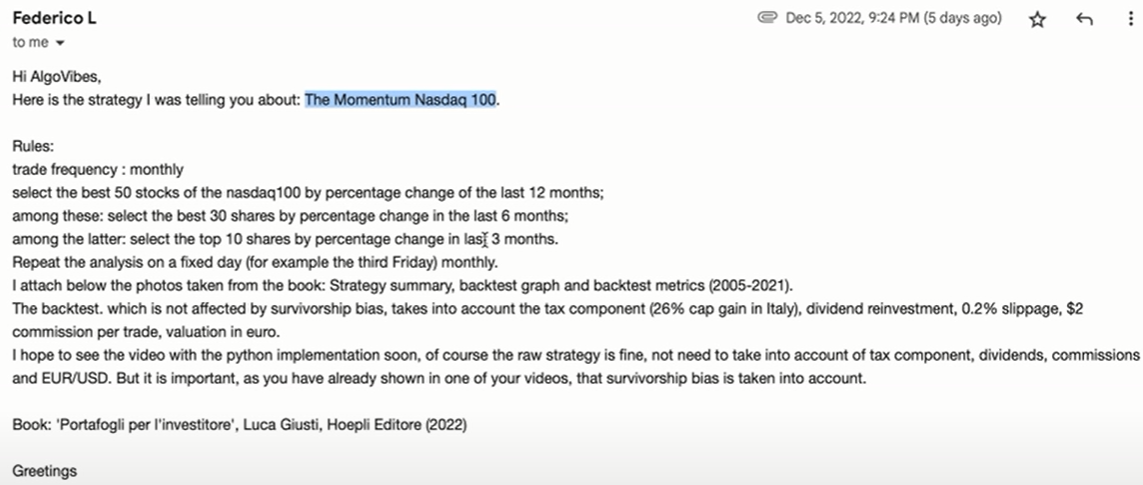

In [2]:
from IPython.display import Image
Image("qqq-mom.PNG")

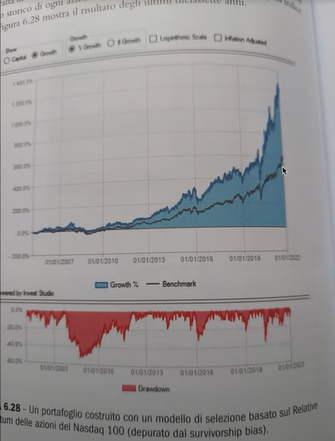

In [1]:
Image("qqq-mom-backtest.PNG")

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np

[Nasdaq-100](https://en.wikipedia.org/wiki/Nasdaq-100)

In [2]:
ticker_df = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]

In [3]:
ticker_df

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Activision Blizzard,ATVI,Communication Services,Interactive Home Entertainment
1,Adobe Inc.,ADBE,Information Technology,Application Software
2,ADP,ADP,Information Technology,Data Processing & Outsourced Services
3,Airbnb,ABNB,Consumer Discretionary,Internet & Direct Marketing Retail
4,Align Technology,ALGN,Health Care,Health Care Supplies
...,...,...,...,...
96,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
97,"Workday, Inc.",WDAY,Information Technology,Application Software
98,Xcel Energy,XEL,Utilities,Multi-Utilities
99,Zoom Video Communications,ZM,Information Technology,Application Software


In [4]:
tickers = ticker_df.Ticker.to_list()

In [5]:
tickers[:10]

['ATVI', 'ADBE', 'ADP', 'ABNB', 'ALGN', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP']

In [16]:
df = yf.download(tickers, start="2010-01-01")["Adj Close"]

[*********************100%***********************]  101 of 101 completed


In [17]:
df

,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,...,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.515213,NaN,37.090000,23.067617,27.491213,25.670000,21.142138,18.500000,11.328530,9.700000,...,NaN,18.767342,29.074842,44.240002,26.326170,15.840572,NaN,13.504492,NaN,NaN
2010-01-05,6.526476,NaN,37.700001,23.031200,27.343586,25.280001,20.900095,18.010000,11.241386,9.710000,...,NaN,18.659109,29.269646,42.779999,26.114426,16.463976,NaN,13.344337,NaN,NaN
2010-01-06,6.422664,NaN,37.619999,22.987492,27.279402,25.340000,21.111885,17.480000,11.217624,9.570000,...,NaN,18.522013,29.649517,42.029999,25.916811,16.709249,NaN,13.369962,NaN,NaN
2010-01-07,6.410792,NaN,36.889999,22.805407,27.266567,25.480000,21.293406,17.430000,11.098790,9.470000,...,NaN,18.579731,29.600824,41.500000,26.072071,16.699030,NaN,13.312307,NaN,NaN
2010-01-08,6.453412,NaN,36.689999,22.936512,27.228046,26.260000,21.547552,17.660000,11.526584,9.430000,...,NaN,19.005438,29.220943,40.669998,26.107370,16.750128,NaN,13.318710,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,85.250000,338.450012,163.839996,240.940002,188.160004,95.690002,203.669998,97.220001,64.519997,...,123.150002,164.380005,175.610001,289.690002,38.630001,9.170000,164.639999,70.446365,65.889999,108.779999
2022-12-27,130.029999,83.489998,335.089996,162.199997,241.029999,186.289993,96.290001,204.589996,95.339996,63.270000,...,109.099998,163.779999,175.559998,287.320007,38.310001,9.230000,163.399994,71.082001,65.459999,107.570000
2022-12-28,126.040001,82.489998,328.329987,160.279999,237.850006,181.899994,95.360001,201.580002,94.230003,62.570000,...,112.709999,161.190002,174.229996,285.760010,37.580002,8.870000,162.990005,70.570000,65.360001,107.860001


In [18]:
df.to_csv("nasdaq-100.csv")

In [13]:
df = pd.read_csv("nasdaq-100.csv", parse_dates=["Date"])

In [14]:
df.columns

Index(['Date', 'AAPL', 'ABNB', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN',
       'AMAT',
       ...
       'TSLA', 'TXN', 'VRSK', 'VRTX', 'WBA', 'WBD', 'WDAY', 'XEL', 'ZM', 'ZS'],
      dtype='object', length=102)

In [15]:
df

,Date,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,...,TSLA,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZM,ZS
0,2010-01-04,6.515213,NaN,37.090000,23.067617,27.491213,25.670000,21.142138,18.500000,11.328530,...,NaN,18.767342,29.074842,44.240002,26.326170,15.840572,NaN,13.504492,NaN,NaN
1,2010-01-05,6.526476,NaN,37.700001,23.031200,27.343586,25.280001,20.900095,18.010000,11.241386,...,NaN,18.659109,29.269646,42.779999,26.114426,16.463976,NaN,13.344337,NaN,NaN
2,2010-01-06,6.422664,NaN,37.619999,22.987492,27.279402,25.340000,21.111885,17.480000,11.217624,...,NaN,18.522013,29.649517,42.029999,25.916811,16.709249,NaN,13.369962,NaN,NaN
3,2010-01-07,6.410792,NaN,36.889999,22.805407,27.266567,25.480000,21.293406,17.430000,11.098790,...,NaN,18.579731,29.600824,41.500000,26.072071,16.699030,NaN,13.312307,NaN,NaN
4,2010-01-08,6.453412,NaN,36.689999,22.936512,27.228046,26.260000,21.547552,17.660000,11.526584,...,NaN,19.005438,29.220943,40.669998,26.107370,16.750128,NaN,13.318710,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,2022-12-23,131.860001,85.250000,338.450012,163.839996,240.940002,188.160004,95.690002,203.669998,97.220001,...,123.150002,164.380005,175.610001,289.690002,38.630001,9.170000,164.639999,70.446365,65.889999,108.779999
3268,2022-12-27,130.029999,83.489998,335.089996,162.199997,241.029999,186.289993,96.290001,204.589996,95.339996,...,109.099998,163.779999,175.559998,287.320007,38.310001,9.230000,163.399994,71.082001,65.459999,107.570000
3269,2022-12-28,126.040001,82.489998,328.329987,160.279999,237.850006,181.899994,95.360001,201.580002,94.230003,...,112.709999,161.190002,174.229996,285.760010,37.580002,8.870000,162.990005,70.570000,65.360001,107.860001
3270,2022-12-29,129.610001,85.230003,337.579987,163.979996,240.619995,188.119995,96.010002,212.139999,97.139999,...,121.820000,165.020004,178.059998,289.079987,37.470001,9.430000,167.789993,71.070000,68.000000,111.870003


In [16]:
df.set_index("Date", inplace=True)

In [17]:
df = df.dropna(axis=1)

In [18]:
df.shape

(3272, 78)

In [19]:
df.pct_change()

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,0.016446,-0.001579,-0.005370,-0.015193,-0.011448,-0.026486,-0.007692,0.001031,-0.008663,...,-0.000949,0.061538,-0.008467,0.002509,-0.005767,0.006700,-0.033002,-0.008043,0.039355,-0.011859
2010-01-06,-0.015906,-0.002122,-0.001898,-0.002347,0.002373,0.010133,-0.029428,-0.002114,-0.014418,-0.007515,...,0.027540,0.000000,-0.001798,-0.067585,-0.007347,0.012978,-0.017532,-0.007567,0.014898,0.001920
2010-01-07,-0.001848,-0.019405,-0.007921,-0.000470,0.005525,0.008598,-0.002860,-0.010593,-0.010449,-0.009157,...,-0.005545,-0.028985,-0.002701,0.009396,0.003116,-0.001642,-0.012610,0.005991,-0.000612,-0.004312
2010-01-08,0.006648,-0.005422,0.005749,-0.001413,0.030612,0.011935,0.013196,0.038544,-0.004224,0.008886,...,0.005576,0.000000,0.007223,-0.055851,0.022912,-0.012833,-0.020000,0.001354,0.003060,0.000481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,-0.002798,0.005735,0.000550,0.007443,0.000319,0.012914,0.000885,-0.003893,0.010335,-0.005052,...,-0.025621,0.005164,-0.004694,0.003512,-0.001943,0.006476,-0.014392,0.004943,-0.006500,0.012852
2022-12-27,-0.013878,-0.009928,-0.010010,0.000374,-0.009938,0.006270,0.004517,-0.019338,-0.019374,-0.002008,...,-0.015824,-0.010274,-0.007058,0.006928,-0.003650,-0.000285,-0.008181,-0.008284,0.006543,0.009023
2022-12-28,-0.030685,-0.020174,-0.011837,-0.013193,-0.023565,-0.009658,-0.014712,-0.011642,-0.011064,-0.007479,...,0.001040,-0.008651,-0.008303,-0.014256,-0.015814,-0.007576,-0.005429,-0.019055,-0.039003,-0.007203


In [20]:
# montly returns
mtl = (1+ df.pct_change())[1:].resample("M").prod()

In [21]:
mtl

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.897435,0.870855,0.851279,0.952370,0.926763,0.991700,1.013514,0.851748,0.769072,1.013167,...,0.979127,1.292308,0.947861,0.706399,0.869486,0.942044,0.867993,0.966487,0.956774,0.985769
2010-02-28,1.065396,1.072755,1.084570,1.020104,1.171921,0.982246,0.965333,1.009773,1.060322,0.968023,...,0.988372,1.214285,1.029619,1.095915,1.083555,1.006401,1.055729,0.981576,1.050236,1.001443
2010-03-31,1.148470,1.020779,0.992336,1.077119,1.053802,1.016657,1.068508,1.100490,1.171934,1.057057,...,1.170588,0.852942,1.021461,1.147488,1.003692,0.996467,1.008140,1.052497,1.084751,1.030484
2010-04-30,1.111022,0.949958,1.038515,0.975264,1.156910,1.003511,0.879007,1.023014,0.978425,0.957721,...,1.055276,1.356321,1.012964,1.077684,1.067762,0.993617,0.948618,0.947695,1.146197,1.025943
2010-05-31,0.983875,0.954762,0.982144,0.942587,0.860841,0.943655,0.877647,0.942779,0.944873,0.903507,...,1.050000,0.872881,0.945278,1.178244,0.938870,1.079586,0.892185,0.915058,0.972373,0.942069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.968792,0.910563,0.885434,1.013645,0.932600,1.024625,0.867352,0.889890,0.898380,0.978526,...,0.857262,0.914671,0.941551,1.006291,0.923528,0.983758,1.004814,0.895423,0.882667,1.014621
2022-09-30,0.879023,0.736932,0.919554,0.929452,0.925944,0.862774,0.849856,0.870947,0.746554,0.937994,...,0.886837,0.937603,0.882926,0.931995,0.936868,0.912665,1.027612,0.895608,0.868580,0.867592
2022-10-31,1.109551,1.157340,1.023540,1.068571,1.147216,1.017004,0.938149,1.077627,0.947917,1.199423,...,0.929328,1.057793,0.957579,1.129612,1.046070,1.072128,1.077571,1.162420,1.130435,1.017344


In [22]:
# function for rolling performance
def get_rolling_ret(df,n):
    return df.rolling(n).apply(np.prod)

In [27]:
ret_12 = get_rolling_ret(mtl,12)
ret_6 = get_rolling_ret(mtl,6)
ret_3 = get_rolling_ret(mtl,3)

In [29]:
ret_3

,AAPL,ADBE,ADI,ADP,ADSK,AEP,ALGN,AMAT,AMD,AMGN,...,SGEN,SIRI,SNPS,TMUS,TXN,VRSK,VRTX,WBA,WBD,XEL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-31,1.098079,0.953626,0.916196,1.046438,1.144527,0.990318,1.045405,0.946501,0.955670,1.036729,...,1.132827,1.338462,0.996881,0.888331,0.945615,0.944724,0.923825,0.998484,1.090000,1.017285
2010-04-30,1.359419,1.040248,1.117711,1.071594,1.428752,1.002113,0.906667,1.136820,1.215818,0.979993,...,1.220930,1.404762,1.065350,1.355240,1.161251,0.996444,1.009635,0.979069,1.305799,1.058744
2010-05-31,1.255401,0.925830,1.012155,0.990165,1.049498,0.962742,0.824309,1.061397,1.083439,0.914680,...,1.297059,1.009804,0.978082,1.457050,1.006190,1.068905,0.853231,0.912721,1.208989,0.995973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,1.057769,0.896658,0.904153,1.101511,0.971071,0.989778,0.877755,0.804080,0.833202,0.943195,...,1.137161,0.954688,1.084022,1.080051,0.940813,1.072030,1.048800,0.809415,0.717615,0.992615
2022-09-30,1.012229,0.751789,0.958386,1.081544,1.086299,0.908162,0.875100,0.902831,0.828560,0.933583,...,0.773313,0.934544,1.005960,0.997250,1.013989,0.986853,1.027503,0.838342,0.856930,0.910383
2022-10-31,0.944883,0.776602,0.833371,1.006737,0.990662,0.899052,0.691533,0.835212,0.635757,1.100892,...,0.706523,0.907161,0.796054,1.059416,0.905086,0.962601,1.112656,0.932200,0.866667,0.895545


In [44]:
date = "2010-12-31"
top_50_x = ret_12.loc[date].nlargest(50)
top_50 = top_50_x.index

In [45]:
top_50, top_50_x

(Index(['NFLX', 'SIRI', 'LULU', 'ILMN', 'FTNT', 'BKNG', 'DLTR', 'ODFL', 'INTU',
        'DXCM', 'PCAR', 'TMUS', 'ORLY', 'CTSH', 'MAR', 'AVGO', 'AAPL', 'ROST',
        'ADSK', 'FAST', 'SGEN', 'SBUX', 'BKR', 'CSGP', 'HON', 'CDNS', 'CSX',
        'WBD', 'AMZN', 'REGN', 'MNST', 'MELI', 'CMCSA', 'LRCX', 'IDXX', 'TXN',
        'BIIB', 'MCHP', 'KDP', 'COST', 'ADI', 'SNPS', 'MDLZ', 'FISV', 'XEL',
        'ANSS', 'EBAY', 'VRSK', 'ADP', 'ATVI'],
       dtype='object'),
 NFLX     3.285340
 SIRI     2.507693
 LULU     2.213523
 ILMN     2.073322
 FTNT     1.797222
 BKNG     1.784024
 DLTR     1.746315
 ODFL     1.638272
 INTU     1.600130
 DXCM     1.594626
 PCAR     1.588710
 TMUS     1.584693
 ORLY     1.569351
 CTSH     1.566025
 MAR      1.512679
 AVGO     1.510368
 AAPL     1.507219
 ROST     1.499510
 ADSK     1.488118
 FAST     1.462922
 SGEN     1.418406
 SBUX     1.413028
 BKR      1.403905
 CSGP     1.362367
 HON      1.354821
 CDNS     1.349673
 CSX      1.347795
 WBD      1.345161
 AMZ

In [38]:
top_30_x = ret_6.loc[date, top_50].nlargest(30)
top_30 = top_30_x.index

In [43]:
top_30, top_30_x

(Index(['BKNG', 'FTNT', 'LULU', 'SIRI', 'AMZN', 'NFLX', 'ADSK', 'TMUS', 'CSGP',
        'REGN', 'CTSH', 'ILMN', 'PCAR', 'CDNS', 'EBAY', 'INTU', 'BIIB', 'TXN',
        'MAR', 'BKR', 'HON', 'ADI', 'ODFL', 'LRCX', 'AVGO', 'DLTR', 'MNST',
        'SBUX', 'COST', 'CSX'],
       dtype='object'),
 BKNG    2.263226
 FTNT    1.967761
 LULU    1.838259
 SIRI    1.715789
 AMZN    1.647447
 NFLX    1.617119
 ADSK    1.568144
 TMUS    1.542125
 CSGP    1.483505
 REGN    1.470878
 CTSH    1.464043
 ILMN    1.455088
 PCAR    1.452208
 CDNS    1.426598
 EBAY    1.419174
 INTU    1.417889
 BIIB    1.413066
 TXN     1.408849
 MAR     1.392285
 BKR     1.383970
 HON     1.380470
 ADI     1.370821
 ODFL    1.365538
 LRCX    1.360483
 AVGO    1.352589
 DLTR    1.347105
 MNST    1.336743
 SBUX    1.334811
 COST    1.326041
 CSX     1.313832
 Name: 2010-12-31 00:00:00, dtype: float64)

In [41]:
top_10_x = ret_3.loc[date, top_30].nlargest(10)
top_10 = top_10_x.index

In [42]:
top_10, top_10_x

(Index(['LULU', 'SIRI', 'BKR', 'FTNT', 'ILMN', 'AVGO', 'SBUX', 'ODFL', 'LRCX',
        'HON'],
       dtype='object'),
 LULU    1.529964
 SIRI    1.358333
 BKR     1.346364
 FTNT    1.294000
 ILMN    1.287398
 AVGO    1.265462
 SBUX    1.262867
 ODFL    1.258458
 LRCX    1.237276
 HON     1.217447
 Name: 2010-12-31 00:00:00, dtype: float64)

In [65]:
mtl = (1+ df.pct_change())[1:].resample("M").prod()

def get_top_10(mtl, date, N1=50, N2=30, N3=10):
    # montly returns
    # 3 rolling returns: 12/6/3 months
    ret_12, ret_6, ret_3 = get_rolling_ret(mtl,12), get_rolling_ret(mtl,6), get_rolling_ret(mtl,3)
    top_50 = ret_12.loc[date].nlargest(N1).index
    top_30 = ret_6.loc[date, top_50].nlargest(N2).index
    top_10 = ret_3.loc[date, top_30].nlargest(N3).index
    return top_10

In [66]:
top_10 = get_top_10(mtl, date)

In [67]:
top_10

Index(['LULU', 'SIRI', 'BKR', 'FTNT', 'ILMN', 'AVGO', 'SBUX', 'ODFL', 'LRCX',
       'HON'],
      dtype='object')

In [68]:
portfolio = mtl.loc[date:, top_10][1:2]  # next month return for top 10 selection

In [69]:
portfolio

,LULU,SIRI,BKR,FTNT,ILMN,AVGO,SBUX,ODFL,LRCX,HON
Date,,,,,,,,,,
2011-01-31,1.0038,0.993865,1.198356,1.188563,1.094727,1.01056,0.981326,1.005627,0.9635,1.053612


In [72]:
portfolio.mean(axis=1).values[0]  # 1.0493933841821117

1.0493933841821117

In [71]:
def pf_performance(mtl, date):
    portfolio = mtl.loc[date:, get_top_10(mtl, date)][1:2]
    return portfolio.mean(axis=1).values[0]

In [73]:
print(pf_performance(mtl, date))

1.0493933841821117


In [75]:
mtl.index[:-1]

DatetimeIndex(['2010-01-31', '2010-02-28', '2010-03-31', '2010-04-30',
               '2010-05-31', '2010-06-30', '2010-07-31', '2010-08-31',
               '2010-09-30', '2010-10-31',
               ...
               '2022-02-28', '2022-03-31', '2022-04-30', '2022-05-31',
               '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30',
               '2022-10-31', '2022-11-30'],
              dtype='datetime64[ns]', name='Date', length=155, freq='M')

In [1]:
returns = []

dates = mtl.index[:-1]

NameError: name 'mtl' is not defined

In [76]:
for date in mtl.index[:-1]:
    returns.append(pf_performance(mtl, date))

KeyboardInterrupt: 

## visualize Nasdaq return

In [3]:
nas_df = yf.download("^IXIC", start="2010-01-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
nas_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,2294.409912,2311.149902,2294.409912,2308.419922,2308.419922,1931380000
2010-01-05,2307.270020,2313.729980,2295.620117,2308.709961,2308.709961,2367860000
2010-01-06,2307.709961,2314.070068,2295.679932,2301.090088,2301.090088,2253340000
2010-01-07,2298.090088,2301.300049,2285.219971,2300.050049,2300.050049,2270050000
2010-01-08,2292.239990,2317.600098,2290.610107,2317.169922,2317.169922,2145390000
...,...,...,...,...,...,...
2022-12-23,10437.750000,10514.759766,10361.820312,10497.860352,10497.860352,3544680000
2022-12-27,10462.190430,10472.320312,10340.730469,10353.230469,10353.230469,3827290000
2022-12-28,10339.200195,10414.820312,10207.469727,10213.290039,10213.290039,3842970000


In [5]:
nas_perf_df = (nas_df["Adj Close"].pct_change()+1.0).cumprod()

In [6]:
nas_perf_df

Date
2010-01-04         NaN
2010-01-05    1.000126
2010-01-06    0.996825
2010-01-07    0.996374
2010-01-08    1.003790
                ...   
2022-12-23    4.547639
2022-12-27    4.484986
2022-12-28    4.424364
2022-12-29    4.539074
2022-12-30    4.534045
Name: Adj Close, Length: 3272, dtype: float64

<AxesSubplot:xlabel='Date'>

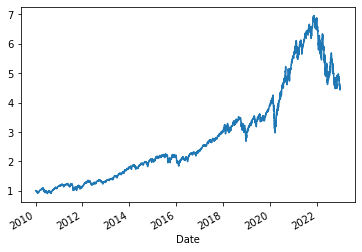

In [7]:
nas_perf_df.plot()